In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [23]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
    fx = sigmoid(x)
    return fx * (1 - fx)

def binary_cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [24]:
class NeuralNetwork:
    def __init__(self):
        self.w1 = np.random.normal()
        print(f"Initial w1: {self.w1}")
        self.w2 = np.random.normal()
        print(f"Initial w2: {self.w2}")
        self.w3 = np.random.normal()
        print(f"Initial w3: {self.w3}")
        self.w4 = np.random.normal()
        print(f"Initial 4: {self.w4}")
        self.w5 = np.random.normal()
        print(f"Initial w5: {self.w5}")
        self.w6 = np.random.normal()
        print(f"Initial w6: {self.w6}")

        self.b1 = np.random.normal()
        print(f"Initial b1: {self.b1}")
        self.b2 = np.random.normal()
        print(f"Initial b2: {self.b2}")
        self.b3 = np.random.normal()
        print(f"Initial b3: {self.b3}")
        
        print('~~~~~~~~~~~~~~~')

    def feedforward(self, x):
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
        return o1
    
    def classify(self, x):
        """Classify the input based on the prediction."""
        y_pred = self.feedforward(x)
        return "Good" if y_pred >= 0.5 else "Bad"

    def train(self, data, all_y_trues):
        learn_rate = 0.1
        epochs = 10000
        loss_history = []  # To store loss at each epoch

        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):
                # Forward pass
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(sum_h1)

                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = sigmoid(sum_h2)

                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = sigmoid(sum_o1)
                y_pred = o1

                # Calculate the gradients and update weights
                d_L_d_ypred = -2 * (y_true - y_pred)

                # Backpropagation
                d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
                d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
                d_ypred_d_b3 = deriv_sigmoid(sum_o1)

                self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
                self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
                self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

                d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
                d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
                d_h1_d_b1 = deriv_sigmoid(sum_h1)

                d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
                d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
                d_h2_d_b2 = deriv_sigmoid(sum_h2)

                self.w1 -= learn_rate * d_L_d_ypred * self.w5 * d_h1_d_w1
                self.w2 -= learn_rate * d_L_d_ypred * self.w5 * d_h1_d_w2
                self.b1 -= learn_rate * d_L_d_ypred * self.w5 * d_h1_d_b1

                self.w3 -= learn_rate * d_L_d_ypred * self.w6 * d_h2_d_w3
                self.w4 -= learn_rate * d_L_d_ypred * self.w6 * d_h2_d_w4
                self.b2 -= learn_rate * d_L_d_ypred * self.w6 * d_h2_d_b2

            # Calculate loss
            y_preds = np.apply_along_axis(self.feedforward, 1, data)
            loss = binary_cross_entropy_loss(all_y_trues, y_preds)
            loss_history.append(loss)

            if epoch % 100 == 0:
                print("Epoch %d loss: %.3f" % (epoch, loss))

        # Plot the loss history
        plt.plot(loss_history)
        plt.title('Training Loss Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.grid()
        plt.show()

In [25]:
# Prepare the dataset
data = np.array([
    [2104, 3],
    [1600, 3],
    [2400, 3],
    [1416, 2],
    [3000, 4],
    [1985, 4],
    [1534, 3],
    [1427, 3],
    [1380, 3],
    [1494, 3]
])

In [26]:
all_y_trues = np.array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1])

# Normalize the dataset
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Split data into training and test sets
train_data, test_data, train_labels, test_labels = train_test_split(data, all_y_trues, test_size=0.2, random_state=42)



Initial w1: -2.5207067345819847
Initial w2: 1.196013297636358
Initial w3: 2.3171938689275757
Initial 4: 2.910174973338461
Initial w5: -0.8845102425533418
Initial w6: 1.5258257007686002
Initial b1: -1.5007286091268548
Initial b2: 0.540605491184858
Initial b3: 1.0839887623294278
~~~~~~~~~~~~~~~
Epoch 0 loss: 0.911
Epoch 100 loss: 0.622
Epoch 200 loss: 0.592
Epoch 300 loss: 0.573
Epoch 400 loss: 0.562
Epoch 500 loss: 0.555
Epoch 600 loss: 0.550
Epoch 700 loss: 0.547
Epoch 800 loss: 0.544
Epoch 900 loss: 0.542
Epoch 1000 loss: 0.541
Epoch 1100 loss: 0.539
Epoch 1200 loss: 0.538
Epoch 1300 loss: 0.537
Epoch 1400 loss: 0.537
Epoch 1500 loss: 0.536
Epoch 1600 loss: 0.535
Epoch 1700 loss: 0.535
Epoch 1800 loss: 0.535
Epoch 1900 loss: 0.534
Epoch 2000 loss: 0.534
Epoch 2100 loss: 0.534
Epoch 2200 loss: 0.533
Epoch 2300 loss: 0.533
Epoch 2400 loss: 0.533
Epoch 2500 loss: 0.532
Epoch 2600 loss: 0.532
Epoch 2700 loss: 0.532
Epoch 2800 loss: 0.532
Epoch 2900 loss: 0.532
Epoch 3000 loss: 0.532
Epoch

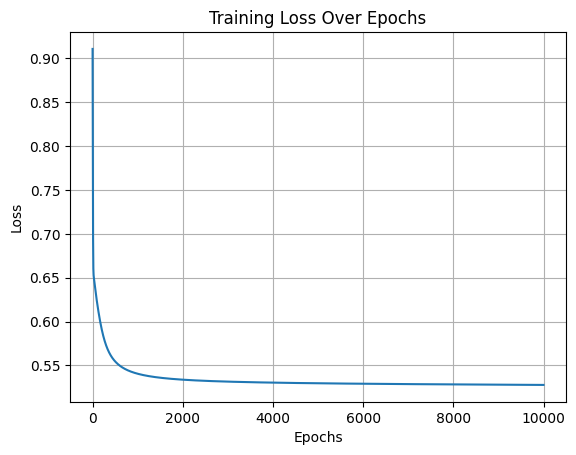

In [27]:
# Initialize and train the network
network = NeuralNetwork()
network.train(train_data, train_labels)

In [35]:
# Define new properties
new_properties = np.array([[2500, 3], [1800, 2],[3000,1],[1000,1], [3000,4]])  # New properties
new_data = scaler.transform(new_properties)  # Normalize the new properties

# HEADER
print(f"{'Area (sq ft)':<15} {'Bathrooms':<10} {'Label':<10} {'Prediction':<10}")

for original, point in zip(new_properties, new_data):
    prediction = network.feedforward(point)
    classification = network.classify(point)
    label = "Good" if classification == "Good" else "Bad"
    # Print the corresponding area, bathrooms, label, and prediction
    print(f"{original[0]:<15} {original[1]:<10} {label:<10} {prediction:.3f}")


Area (sq ft)    Bathrooms  Label      Prediction
2500            3          Good       0.707
1800            2          Bad        0.037
3000            1          Bad        0.027
1000            1          Bad        0.031
3000            4          Good       0.707
